<a href="https://colab.research.google.com/github/ElSangour/PCA_ACP_KMeans/blob/master/ACP_%26_CAH_%26_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification automatique de fromages**
Ce TP retranscrit une démarche de classification automatique d'un ensemble de fromages (29 observations) décrits par leurs propriétés nutritives (ex. proteines, lipides ..., 9 variables)
L'objectif est d'identifier dse groupes de fromages homogènes, partageant des caractéristiques similaires.


In [ ]:
# importation des données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fromage = pd.read_table("fromage.txt", sep="\t", header=0, index_col=0)

# dimension des données
print(fromage.shape)

(29, 9)


In [ ]:
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


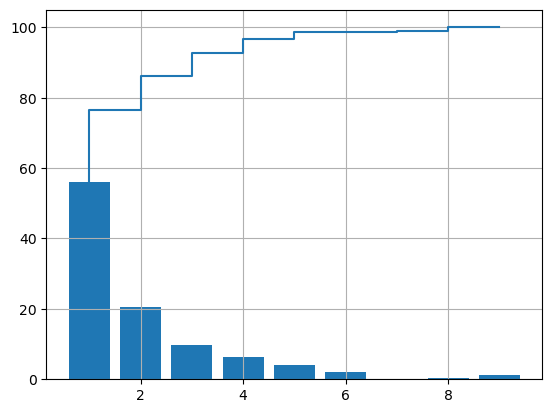

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xss = ss.fit_transform(fromage)
matrice_covariance = np.cov(Xss.T)
matrice_covariance
from numpy.linalg import eig

valeurs_propres, vecteurs_propres = eig(matrice_covariance)
valeurs_propres
vecteurs_propres
somme = valeurs_propres.sum()
plt.bar(range(1,10),(valeurs_propres/somme)*100)
somme_cumulative = np.cumsum((valeurs_propres/somme)*100)
plt.step(range(1,10),somme_cumulative)
plt.grid()

Pourcentage de variance expliquée : 
[0.57593009 0.29003718]
Composantes principales : 
[[-0.60696398 -0.74938177 -0.18992177 -0.05403951 -0.00769672  0.01326533
  -0.03772163 -0.16612827 -0.04212369]
 [ 0.47037398 -0.585205    0.61863398  0.0340537  -0.0826114  -0.08231479
   0.04729289  0.16483443  0.09699691]]


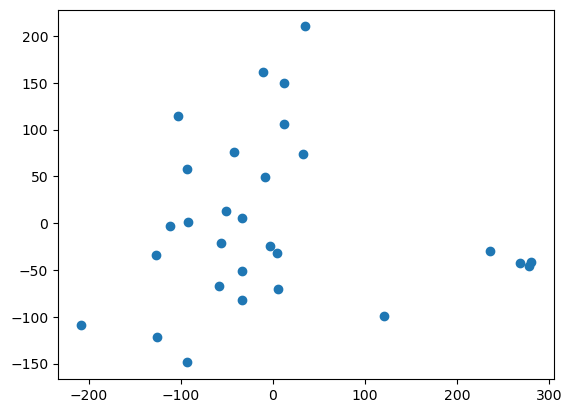

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(fromage)

print("Pourcentage de variance expliquée : ")
print(pca.explained_variance_ratio_)
print("Composantes principales : ")
print(pca.components_)



Z = pca.transform(fromage)
Z.shape
plt.scatter(Z[:,0], Z[:,1])

## Classification Ascendante Hiérarchique (CAH)
Utilisation du package "scipy"

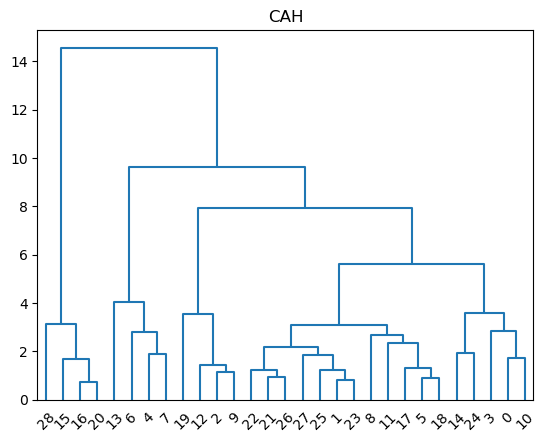

In [ ]:
# librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
fromage_cr = ss.fit_transform(fromage)

# générer la matrice des liens
Z = linkage(fromage_cr,method='ward', metric='euclidean')

Z.shape
#affichage du dendogramme
plt.title("CAH")
dendrogram(Z, color_threshold=0)
plt.show()


In [ ]:
Z.shape

(28, 4)

In [ ]:
fromage.index

Index(['CarredelEst', 'Babybel', 'Beaufort', 'Bleu', 'Camembert', 'Cantal',
       'Chabichou', 'Chaource', 'Cheddar', 'Comte', 'Coulomniers', 'Edam',
       'Emmental', 'Fr.chevrepatemolle', 'Fr.fondu.45', 'Fr.frais20nat.',
       'Fr.frais40nat.', 'Maroilles', 'Morbier', 'Parmesan', 'Petitsuisse40',
       'PontlEveque', 'Pyrenees', 'Reblochon', 'Rocquefort', 'SaintPaulin',
       'Tome', 'Vacherin', 'Yaourtlaitent.nat.'],
      dtype='object', name='Fromages')

Le dendrogramme "suggère" un découpage en 4 groupes.
On remarque qu'une classe de fromages, les "fromages frais" (tout à gauche), se démarque fortement des autres points qu'on aurait pu envisager aussi un découpage en 2 groupes seulement.

### CAH : Découpage en classes-Matérialisation des groupes

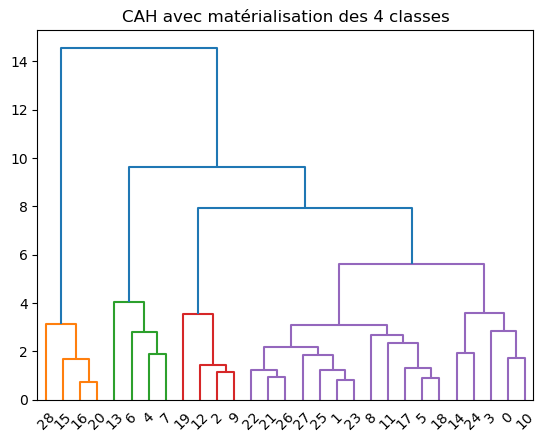

In [ ]:
# matérialisation des 4 classes (hauteur t=7)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z, orientation='top', color_threshold=7)
plt.show()

In [ ]:
#Découpage à la hauteur t=7 ==> identification de 4 groupes obtenus
from scipy.cluster.hierarchy import fcluster
groupes_cah = fcluster(Z, t=7, criterion='distance')
#print(groupes_cah)

#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)

#Affichage des observations et leurs groupes
import pandas
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))


             Fromages
1  Yaourtlaitent.nat.
1      Fr.frais20nat.
1       Petitsuisse40
1      Fr.frais40nat.
2  Fr.chevrepatemolle
2           Camembert
2           Chabichou
2            Chaource
3            Emmental
3            Parmesan
3            Beaufort
3               Comte
4            Pyrenees
4         PontlEveque
4          Rocquefort
4         SaintPaulin
4                Tome
4           Reblochon
4         CarredelEst
4           Maroilles
4            Vacherin
4                Edam
4         Coulomniers
4             Cheddar
4              Cantal
4                Bleu
4             Babybel
4             Morbier
4         Fr.fondu.45


## Méthodes des centres mobiles : K-means

In [ ]:
#K-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(fromage_cr)

#index triés des groupes
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idk],kmeans.labels_[idk]))

#distance aux centres de classes des observations
print(kmeans.transform(fromage_cr))

#correspondance avec les groupes de la CAH
pandas.crosstab(groupes_cah,kmeans.labels_)

C:\Users\rymbe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rymbe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


             Fromages
0            Beaufort
0            Parmesan
0               Comte
0                Edam
0            Emmental
1         CarredelEst
1           Camembert
1           Chabichou
1            Chaource
1         Coulomniers
1  Fr.chevrepatemolle
2       Petitsuisse40
2      Fr.frais40nat.
2      Fr.frais20nat.
2  Yaourtlaitent.nat.
3             Cheddar
3              Cantal
3           Maroilles
3             Morbier
3                Bleu
3             Babybel
3         PontlEveque
3            Pyrenees
3           Reblochon
3          Rocquefort
3         SaintPaulin
3                Tome
3            Vacherin
3         Fr.fondu.45
[[5.21699713 2.22366092 5.52563871 2.91923811]
 [2.79338133 3.0178739  5.19015189 0.74374718]
 [1.14539172 5.16141204 7.50534896 2.85539991]
 [3.90039468 3.23696124 6.12458901 2.10536305]
 [5.1027633  1.93343014 5.40377152 3.54292429]
 [2.20069332 4.02486207 6.29601131 1.19391692]
 [4.53017038 1.77869718 5.92595629 3.38720801]
 [5.0906415

col_0,0,1,2,3
row_0,,,,
1,0,0,4,0
2,0,4,0,0
3,4,0,0,0
4,1,2,0,14


Le groupe 1 de la CAh coincide avec avec le groupe 2 des K-means.
Le groupe 2 de la CAh coincide avec avec le groupe 1 des K-means.
il y a certes des correspondances, mais elle ne sont pas exactes.

KMEANS, à la différence de la CAH, ne fournit pas d’outils d’aide à la détection du nombre de
classes. Nous devons les programmer sous Python ou utiliser des procédures proposées par
des packages dédiés. Le schéma est souvent le même : on fait varier le nombre de groupes et
on surveille l’évolution d’un indicateur de qualité de la solution c. à d. l’aptitude des individus à
être plus proches de ses congénères du même groupe que des individus des autres groupes.
Dans ce qui suit, on calcule la métrique «
silhouette » pour différents nombres de groupes issus
de la méthode des centres mobiles.

C:\Users\rymbe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rymbe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rymbe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\rymbe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[0.48626255 0.36025261 0.34540073 0.31111448 0.27280181 0.25359616
 0.23495265 0.24384669 0.21147739]


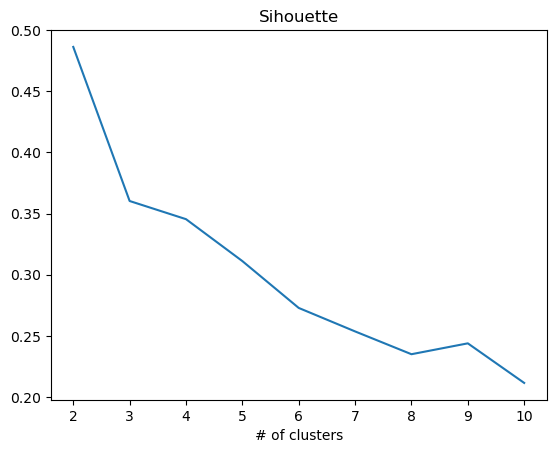

In [ ]:
#librairie pour évaluation des partitions
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res= np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage_cr)
    res[k] = metrics.silhouette_score(fromage_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Sihouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()